In [24]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow as pa
import numpy as np
import pandas as pd

In [150]:
df = pl.read_csv("aac_intakes_outcomes.csv")

print(df.shape)
df.head()


(79672, 41)


age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
str,str,str,str,str,str,i64,f64,str,str,i64,i64,str,str,i64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,i64,i64,f64,str,str,i64,i64,str,str,i64,f64,str,f64
"""10 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",3650,10.0,"""(7.5, 10.0]""","""2017-12-07 14:07:00""",12,2017,"""2017-12""","""Thursday""",0,1.0,2007,7,"""2017-12""","""10 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""Colony Creek And Hunters Trace…","""Normal""","""Stray""","""Neutered Male""",1,3650,10.0,"""(7.5, 10.0]""","""2017-12-07 00:00:00""",12,2017,"""2017-12""","""Thursday""",14,1.0,"""0 days 14:07:00.000000000""",0.588194
"""7 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",2555,7.0,"""(5.0, 7.5]""","""2014-12-20 16:35:00""",12,2014,"""2014-12""","""Saturday""",16,2.0,2007,7,"""2014-12""","""7 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research Blvd in Austin (…","""Normal""","""Public Assist""","""Neutered Male""",1,2555,7.0,"""(5.0, 7.5]""","""2014-12-19 10:21:00""",12,2014,"""2014-12""","""Friday""",10,2.0,"""1 days 06:14:00.000000000""",1.259722
"""6 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",2190,6.0,"""(5.0, 7.5]""","""2014-03-08 17:10:00""",3,2014,"""2014-03""","""Saturday""",17,3.0,2007,7,"""2014-03""","""6 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research in Austin (TX)""","""Normal""","""Public Assist""","""Neutered Male""",1,2190,6.0,"""(5.0, 7.5]""","""2014-03-07 14:26:00""",3,2014,"""2014-03""","""Friday""",14,3.0,"""1 days 02:44:00.000000000""",1.113889
"""10 years""","""A047759""","""2004-04-02 00:00:00""","""Partner""","""Transfer""","""Neutered Male""",3650,10.0,"""(7.5, 10.0]""","""2014-04-07 15:12:00""",4,2014,"""2014-04""","""Monday""",15,1.0,2004,4,"""2014-04""","""10 years""","""A047759""","""Dog""","""Dachshund""","""Tricolor""","""Austin (TX)""","""Normal""","""Owner Surrender""","""Neutered Male""",1,3650,10.0,"""(7.5, 10.0]""","""2014-04-02 15:55:00""",4,2014,"""2014-04""","""Wednesday""",15,1.0,"""4 days 23:17:00.000000000""",4.970139
"""16 years""","""A134067""","""1997-10-16 00:00:00""",null,"""Return to Owner""","""Neutered Male""",5840,16.0,"""(15.0, 17.5]""","""2013-11-16 11:54:00""",11,2013,"""2013-11""","""Saturday""",11,1.0,1997,10,"""2013-11""","""16 years""","""A134067""","""Dog""","""Shetland Sheepdog""","""Brown/White""","""12034 Research Blvd in Austin …","""Injured""","""Public Assist""","""Neutered Male""",1,5840,16.0,"""(15.0, 17.5]""","""2013-11-16 09:02:00""",11,2013,"""2013-11""","""Saturday""",9,1.0,"""0 days 02:52:00.000000000""",0.119444


In [152]:
df.null_count()

age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,43324,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
# drop rows with null outcomes and sex
df = df.drop_nulls(subset=["outcome_type", "sex_upon_intake"])

In [156]:
# dropping columns with redundant information, keeping days for all time columns
df = df.drop(
    [
        "age_upon_outcome",
        "age_upon_outcome_(days)",
        "age_upon_outcome_age_group",
        "outcome_month",
        "outcome_monthyear",
        "outcome_weekday",
        "outcome_hour",
        "dob_year",
        "dob_monthyear",
        "age_upon_intake",
        "age_upon_intake_(days)",
        "age_upon_intake_age_group",
        "intake_month",
        "intake_monthyear",
        "intake_weekday",
        "intake_hour",
        "time_in_shelter",
    ]
)

# convert date columns to datetime type
df = df.with_columns(
    pl.col("date_of_birth").str.to_datetime(),
    pl.col("outcome_datetime").str.to_datetime(),
    pl.col("intake_datetime").str.to_datetime(),
)



In [158]:
df.head(30)

animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(years),outcome_datetime,outcome_year,outcome_number,dob_month,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(years),intake_datetime,intake_year,intake_number,time_in_shelter_days
str,datetime[μs],str,str,str,f64,datetime[μs],i64,f64,i64,str,str,str,str,str,str,str,str,i64,f64,datetime[μs],i64,f64,f64
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",10.0,2017-12-07 14:07:00,2017,1.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""Colony Creek And Hunters Trace…","""Normal""","""Stray""","""Neutered Male""",1,10.0,2017-12-07 00:00:00,2017,1.0,0.588194
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",7.0,2014-12-20 16:35:00,2014,2.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research Blvd in Austin (…","""Normal""","""Public Assist""","""Neutered Male""",1,7.0,2014-12-19 10:21:00,2014,2.0,1.259722
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",6.0,2014-03-08 17:10:00,2014,3.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research in Austin (TX)""","""Normal""","""Public Assist""","""Neutered Male""",1,6.0,2014-03-07 14:26:00,2014,3.0,1.113889
"""A047759""",2004-04-02 00:00:00,"""Partner""","""Transfer""","""Neutered Male""",10.0,2014-04-07 15:12:00,2014,1.0,4,"""A047759""","""Dog""","""Dachshund""","""Tricolor""","""Austin (TX)""","""Normal""","""Owner Surrender""","""Neutered Male""",1,10.0,2014-04-02 15:55:00,2014,1.0,4.970139
"""A134067""",1997-10-16 00:00:00,null,"""Return to Owner""","""Neutered Male""",16.0,2013-11-16 11:54:00,2013,1.0,10,"""A134067""","""Dog""","""Shetland Sheepdog""","""Brown/White""","""12034 Research Blvd in Austin …","""Injured""","""Public Assist""","""Neutered Male""",1,16.0,2013-11-16 09:02:00,2013,1.0,0.119444
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""A233812""",2001-06-08 00:00:00,null,"""Return to Owner""","""Neutered Male""",13.0,2014-09-06 18:52:00,2014,1.0,6,"""A233812""","""Dog""","""Rottweiler/Chow Chow""","""Brown/Black""","""12317 Wycliff Ln in Austin (TX…","""Aged""","""Stray""","""Neutered Male""",1,13.0,2014-09-06 14:37:00,2014,1.0,0.177083
"""A234161""",2001-03-26 00:00:00,null,"""Return to Owner""","""Neutered Male""",12.0,2013-12-27 17:02:00,2013,1.0,3,"""A234161""","""Cat""","""Domestic Shorthair Mix""","""Black/White""","""1401 E Rundberg Ln in Austin (…","""Normal""","""Stray""","""Neutered Male""",1,12.0,2013-12-27 12:13:00,2013,1.0,0.200694
"""A236259""",2001-07-10 00:00:00,null,"""Return to Owner""","""Neutered Male""",13.0,2014-07-09 12:00:00,2014,1.0,7,"""A236259""","""Dog""","""Smooth Fox Terrier Mix""","""Black/Tricolor""","""Westgate & Cameron Loop in Aus…","""Normal""","""Stray""","""Neutered Male""",1,12.0,2014-07-05 07:13:00,2014,1.0,4.199306


In [9]:
df_short = df.head(50000)
df_short.write_csv("data.csv")

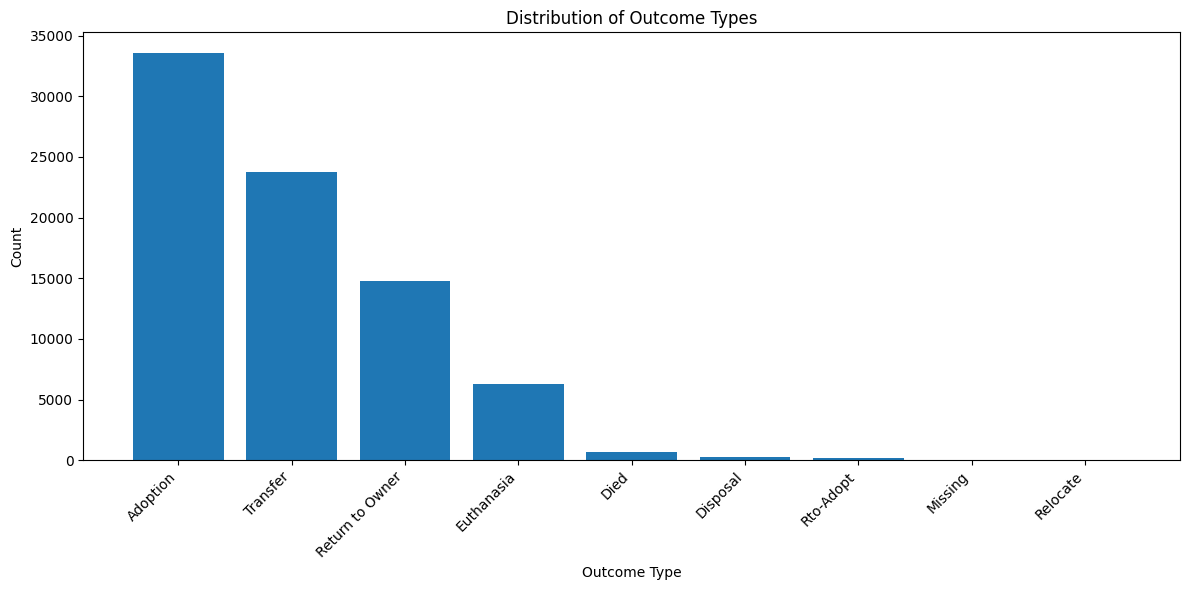

In [40]:

outcome_counts = df['outcome_type'].value_counts().sort('count', descending=True)

plt.figure(figsize=(12, 6))
plt.bar(outcome_counts['outcome_type'], outcome_counts['count'])
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Observation AS: Can analyse reasons for 'Return to Owner' and 'Euthanasia' more ## 
## (AS) I've added some logic to do that below

In [42]:
outcome_counts

outcome_type,count
str,u32
"""Adoption""",33594
"""Transfer""",23799
"""Return to Owner""",14790
"""Euthanasia""",6244
"""Died""",690
"""Disposal""",304
"""Rto-Adopt""",179
"""Missing""",46
"""Relocate""",15


In [118]:
# Analyse "Euthanasia" cases 

euth_analysis = df.filter(pl.col('outcome_type') == 'Euthanasia')\
                    .group_by('outcome_subtype')\
                    .agg([
                        pl.count('outcome_subtype').alias('count'),
                        pl.mean('time_in_shelter_days').alias('avg_time_in_shelter'),

                    ])\
                    .sort('count', descending=True)
euth_analysis

outcome_subtype,count,avg_time_in_shelter
str,u32,f64
"""Suffering""",2549,5.419864
"""Rabies Risk""",2539,0.913033
"""Aggressive""",497,13.117635
"""Medical""",265,8.015529
"""Behavior""",133,21.50353
"""At Vet""",36,40.427141
"""Underage""",28,0.12691
"""Court/Investigation""",23,155.025393
null,0,1.152598


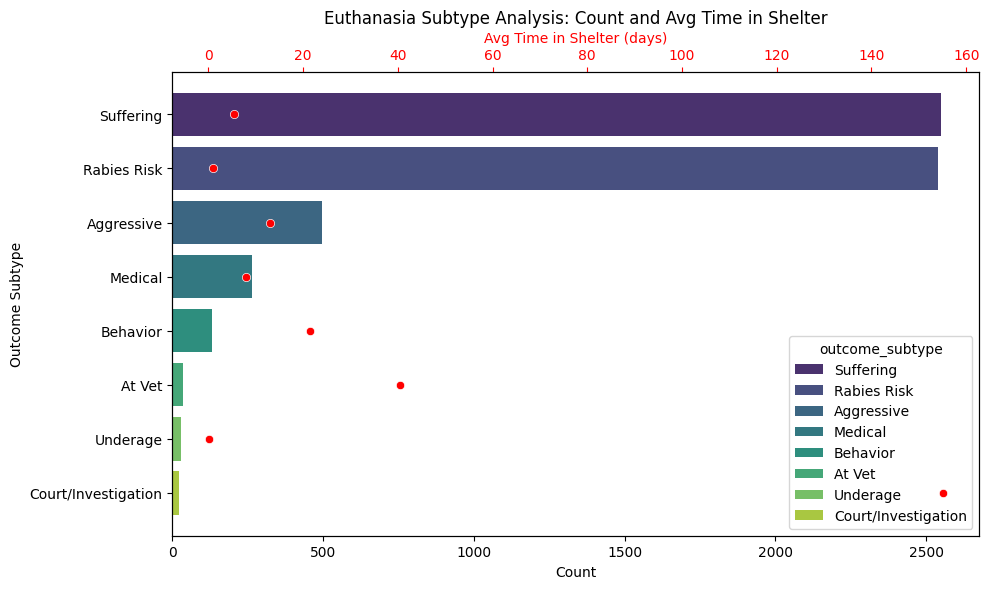

In [52]:
euth_analysis_df = euth_analysis.to_pandas()

# Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot counts as bars
sns.barplot(
    x='count', 
    y='outcome_subtype', 
    data=euth_analysis_df, 
    hue='outcome_subtype',
    palette='viridis', 
    ax=ax1
)
ax1.set_xlabel('Count')
ax1.set_ylabel('Outcome Subtype')
ax1.set_title('Euthanasia Subtype Analysis: Count and Avg Time in Shelter')

# Add a secondary axis for avg_time_in_shelter
ax2 = ax1.twiny()
sns.scatterplot(
    x='avg_time_in_shelter', 
    y='outcome_subtype', 
    data=euth_analysis_df, 
    color='red', 
    marker='o', 
    ax=ax2
)
ax2.set_xlabel('Avg Time in Shelter (days)', color='red')
ax2.tick_params(axis='x', colors='red')

# Display the plot
plt.tight_layout()
plt.show()



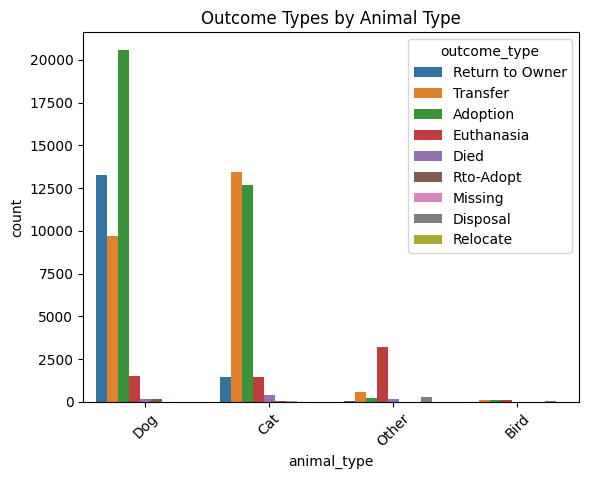

In [60]:
#Outcome Types by Animal Type

sns.countplot(data=df, x='animal_type', hue='outcome_type')
plt.title('Outcome Types by Animal Type')
plt.xticks(rotation=45)
plt.show()


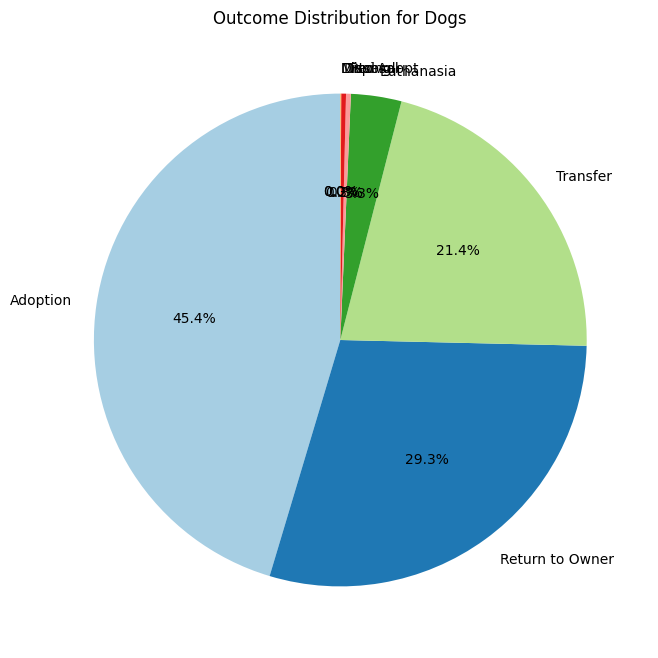

In [128]:
#take an example: dog
dogs_outcome = df.filter(pl.col('animal_type') == 'Dog')\
                    .group_by('outcome_type')\
                    .agg([
                        pl.count('outcome_type').alias('count'),

                    ])\
                    .sort('count', descending=True)


# Step 3: Convert to Pandas for Matplotlib
dogs_outcome.to_pandas()

# Step 4: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    dogs_outcome['count'], 
    labels=dogs_outcome['outcome_type'], 
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate to start at the top
    colors=plt.cm.Paired.colors  # Use a colormap for distinct colors
)
plt.title('Outcome Distribution for Dogs')
plt.show()

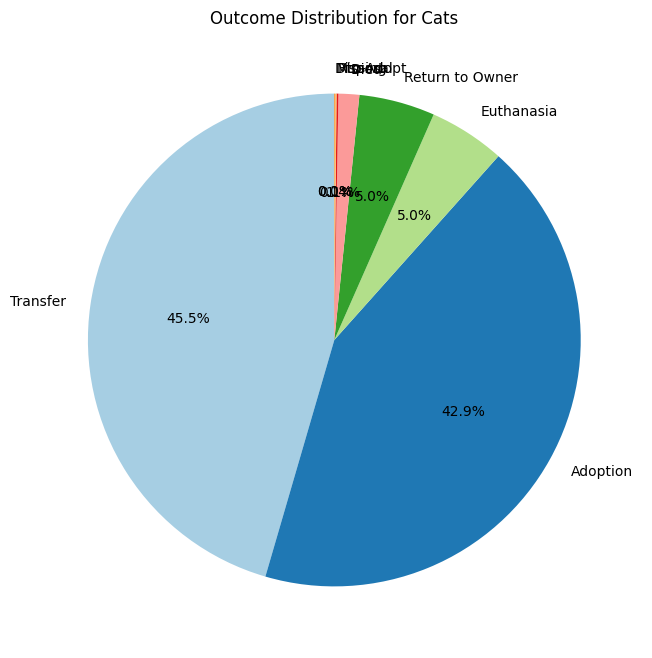

In [130]:
#take an example: cat
cats_outcome = df.filter(pl.col('animal_type') == 'Cat')\
                    .group_by('outcome_type')\
                    .agg([
                        pl.count('outcome_type').alias('count'),

                    ])\
                    .sort('count', descending=True)


# Step 3: Convert to Pandas for Matplotlib
cats_outcome.to_pandas()

# Step 4: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    cats_outcome['count'], 
    labels=cats_outcome['outcome_type'], 
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate to start at the top
    colors=plt.cm.Paired.colors  # Use a colormap for distinct colors
)
plt.title('Outcome Distribution for Cats')
plt.show()

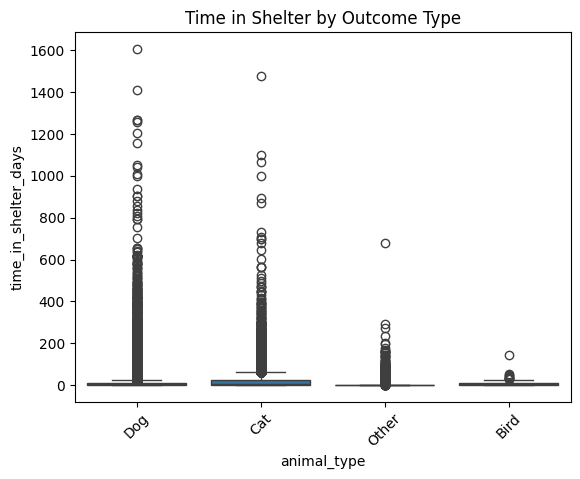

In [132]:
sns.boxplot(data=df, x='animal_type', y='time_in_shelter_days')
plt.title('Time in Shelter by Outcome Type')
plt.xticks(rotation=45)
plt.show()

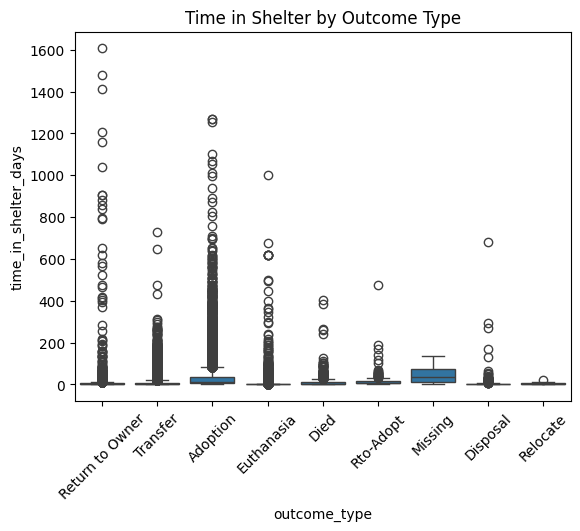

In [134]:
sns.boxplot(data=df, x='outcome_type', y='time_in_shelter_days')
plt.title('Time in Shelter by Outcome Type')
plt.xticks(rotation=45)
plt.show()

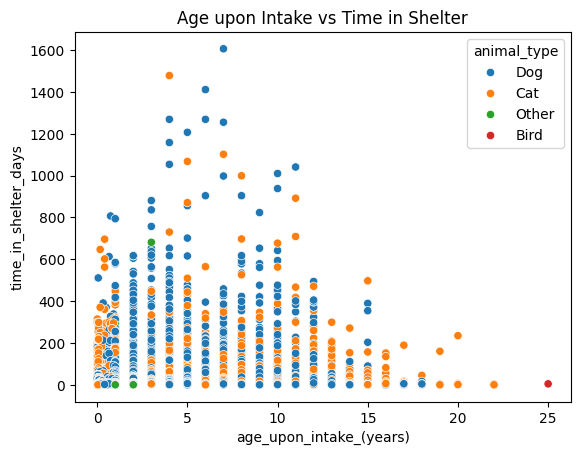

In [162]:
sns.scatterplot(data=df, x='age_upon_intake_(years)', y='time_in_shelter_days', hue='animal_type')
plt.title('Age upon Intake vs Time in Shelter')
plt.show()

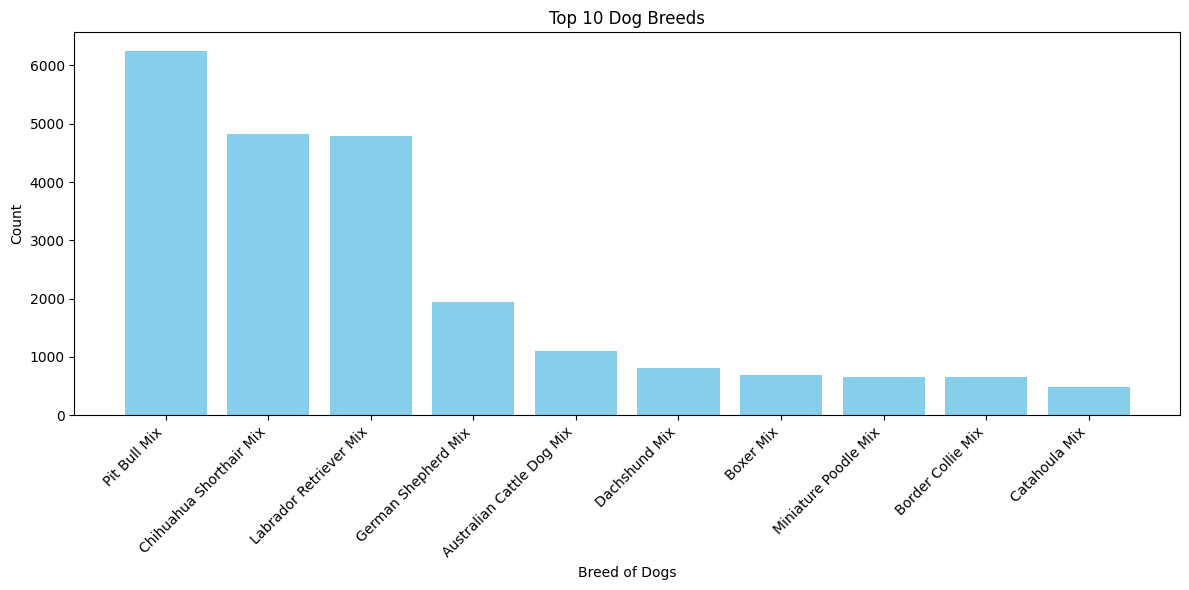

In [226]:
## Analysing trends for dog and cat adoption
#dogs top 10 breeds
#top dog breeds
top_breeds = (
    df.filter(pl.col('animal_type') == 'Dog')
    .group_by('breed')
    .agg(pl.count('breed').alias('count'))  # Use `agg` with `pl.count()`
    .sort('count', descending=True)
    .limit(10)
)

# Convert Polars DataFrame to Pandas for Matplotlib
top_breeds_pd = top_breeds.to_pandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_breeds_pd['breed'], top_breeds_pd['count'], color='skyblue')

plt.title('Top 10 Dog Breeds')
plt.xlabel('Breed of Dogs')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

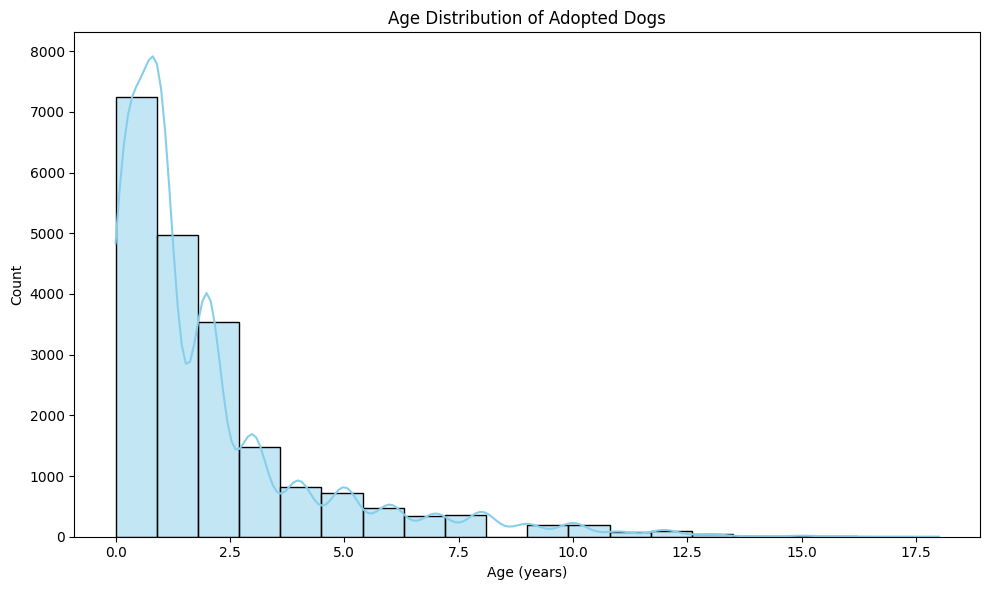

In [230]:
#adoption trends for dogs

# Filter for adopted dogs
dogs_adopted = df.filter(
    (pl.col('animal_type') == 'Dog') & 
    (pl.col('outcome_type') == 'Adoption')
)

# Age Analysis
plt.figure(figsize=(10, 6))
sns.histplot(dogs_adopted['age_upon_outcome_(years)'].to_numpy(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Adopted Dogs')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

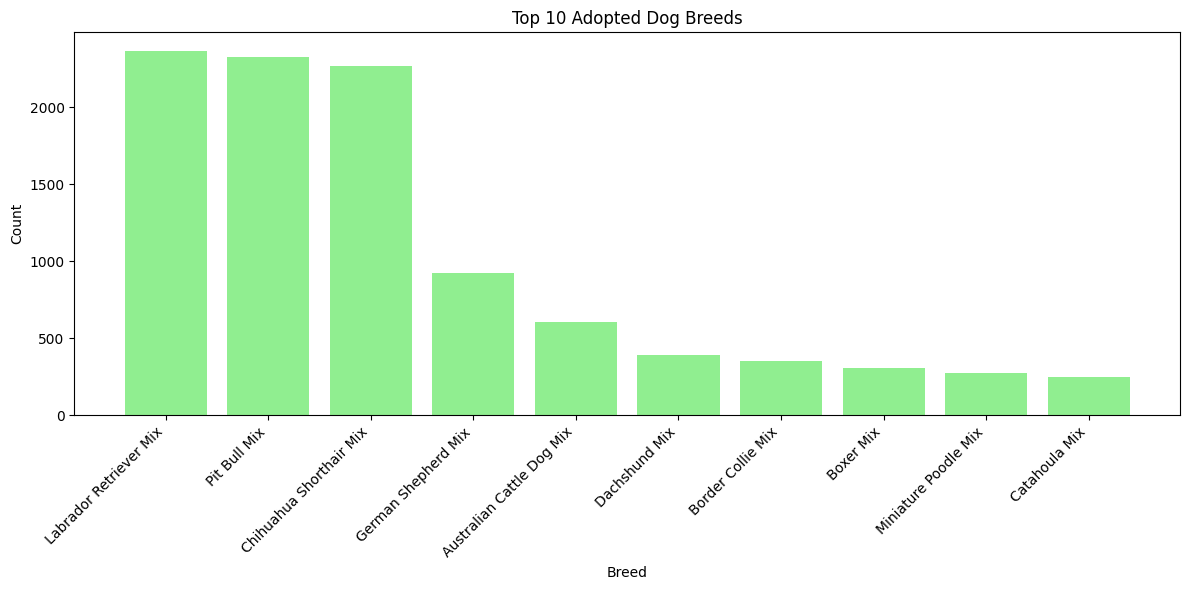

In [232]:
# Top Adopted Breeds
top_breeds = (
    dogs_adopted
    .group_by('breed')
    .agg(pl.len().alias('count'))  # Use `pl.len()` instead of `pl.count()`
    .sort('count', descending=True)
    .limit(10)
)

# Visualization for Top Breeds
plt.figure(figsize=(12, 6))
plt.bar(top_breeds['breed'].to_list(), top_breeds['count'].to_list(), color='lightgreen')
plt.title('Top 10 Adopted Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

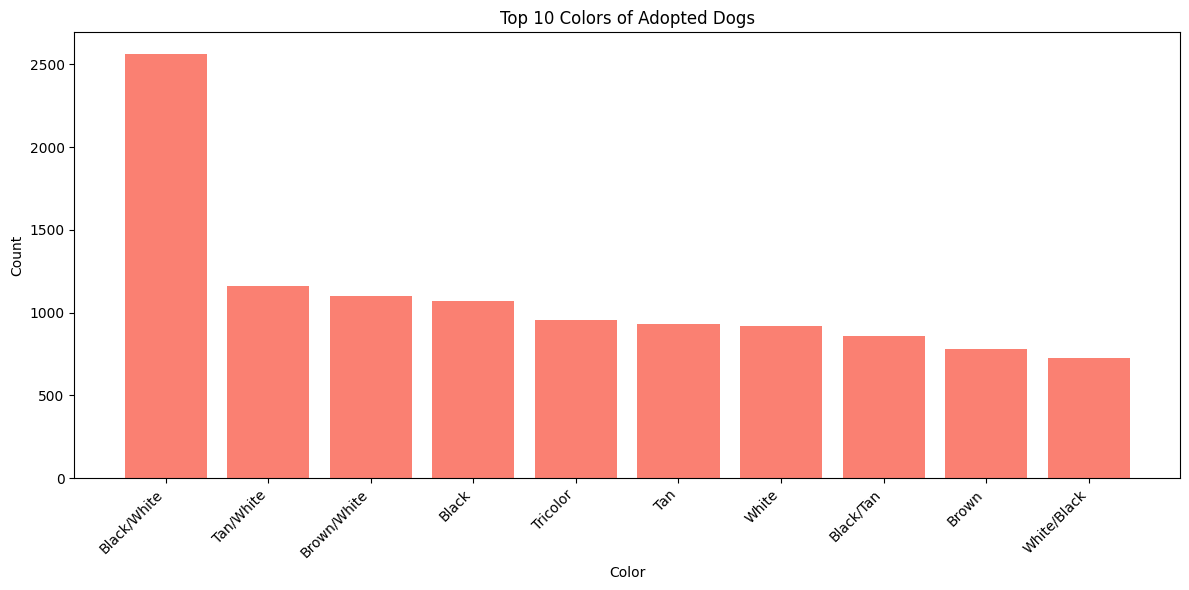

In [236]:
# Color Analysis
top_colors = (
    dogs_adopted
    .group_by('color')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
    .limit(10)
)

plt.figure(figsize=(12, 6))
plt.bar(top_colors['color'].to_list(), top_colors['count'].to_list(), color='salmon')
plt.title('Top 10 Colors of Adopted Dogs')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

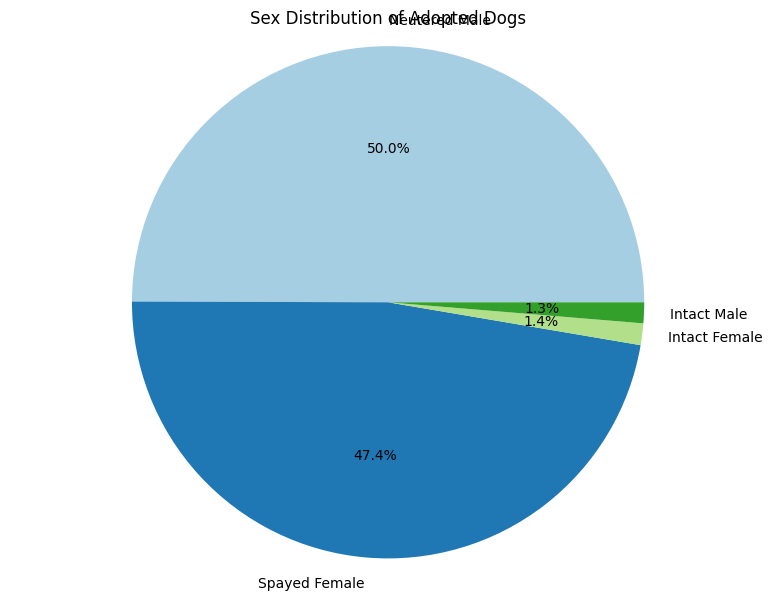

In [238]:
# Sex Analysis
sex_counts = (
    dogs_adopted
    .group_by('sex_upon_outcome')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)

plt.figure(figsize=(8, 6))
plt.pie(
    sex_counts['count'].to_list(), 
    labels=sex_counts['sex_upon_outcome'].to_list(), 
    autopct='%1.1f%%', 
    colors=plt.cm.Paired.colors
)
plt.title('Sex Distribution of Adopted Dogs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

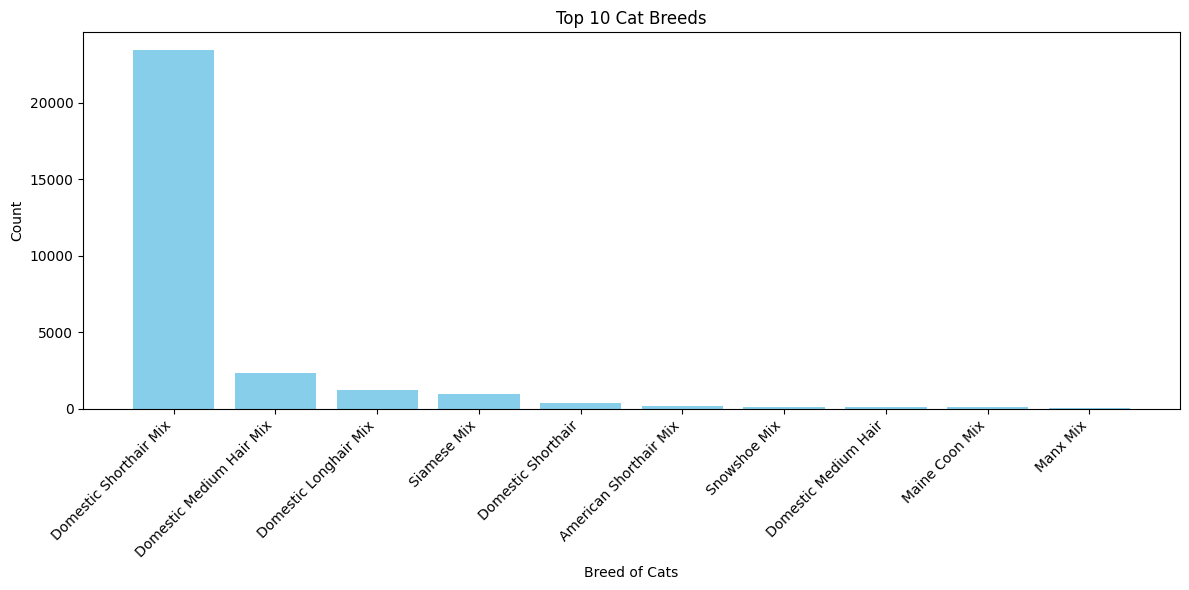

In [242]:

#top cat breeds

top_breeds = (
    df.filter(pl.col('animal_type') == 'Cat')
    .group_by('breed')
    .agg(pl.count('breed').alias('count'))  # Use `agg` with `pl.count()`
    .sort('count', descending=True)
    .limit(10)
)

# Convert Polars DataFrame to Pandas for Matplotlib
top_breeds_pd = top_breeds.to_pandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_breeds_pd['breed'], top_breeds_pd['count'], color='skyblue')

plt.title('Top 10 Cat Breeds')
plt.xlabel('Breed of Cats')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

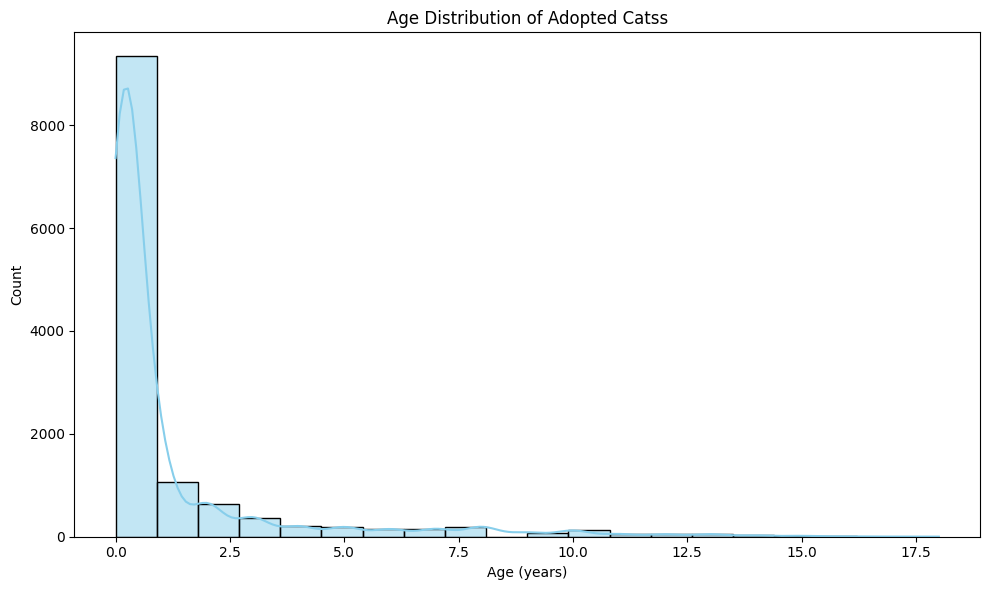

In [246]:
#adoption trends for cats

# Filter for adopted cats
cats_adopted = df.filter(
    (pl.col('animal_type') == 'Cat') & 
    (pl.col('outcome_type') == 'Adoption')
)

# Age Analysis
plt.figure(figsize=(10, 6))
sns.histplot(cats_adopted['age_upon_outcome_(years)'].to_numpy(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Adopted Catss')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

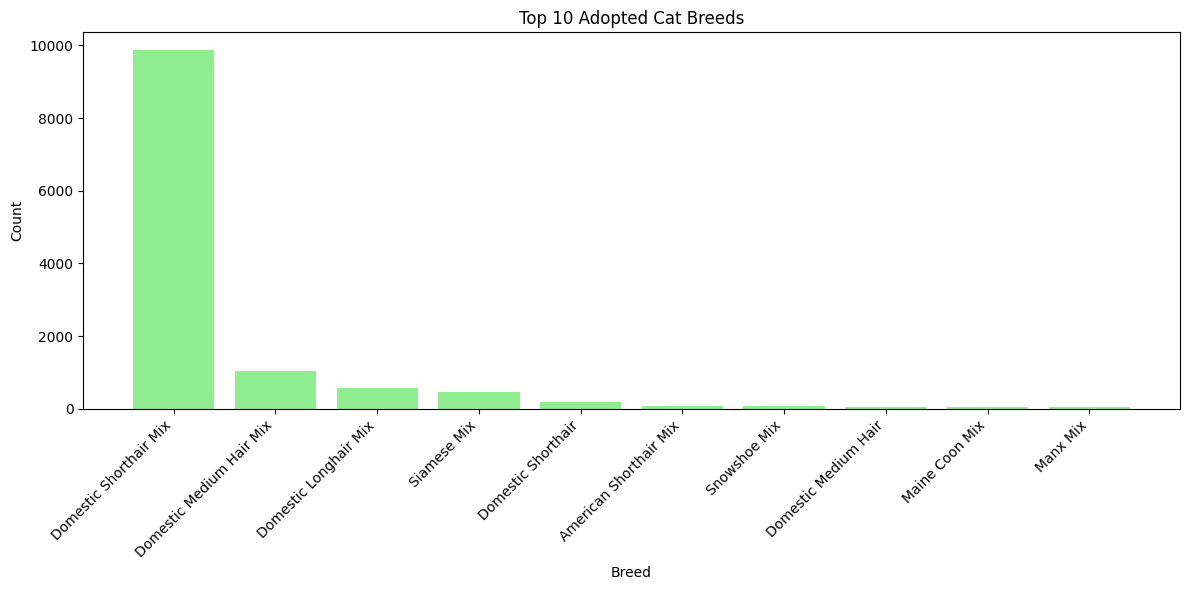

In [248]:
# Top Adopted Breeds
top_breeds = (
    cats_adopted
    .group_by('breed')
    .agg(pl.len().alias('count'))  # Use `pl.len()` instead of `pl.count()`
    .sort('count', descending=True)
    .limit(10)
)

# Visualization for Top Breeds
plt.figure(figsize=(12, 6))
plt.bar(top_breeds['breed'].to_list(), top_breeds['count'].to_list(), color='lightgreen')
plt.title('Top 10 Adopted Cat Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

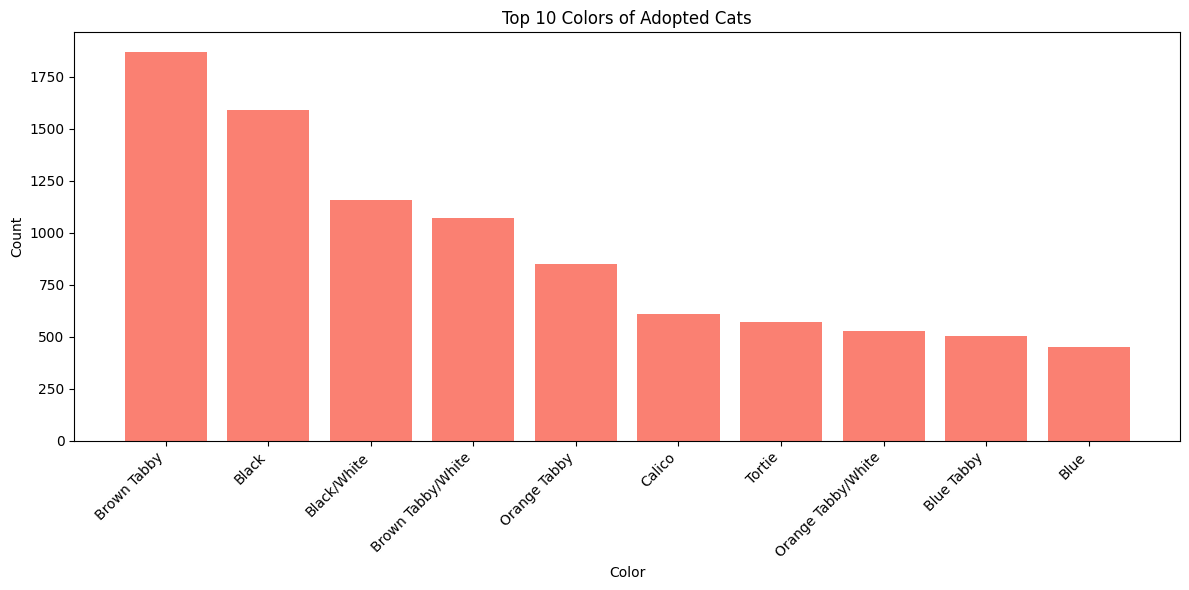

In [250]:
# Color Analysis
top_colors = (
    cats_adopted
    .group_by('color')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
    .limit(10)
)

plt.figure(figsize=(12, 6))
plt.bar(top_colors['color'].to_list(), top_colors['count'].to_list(), color='salmon')
plt.title('Top 10 Colors of Adopted Cats')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

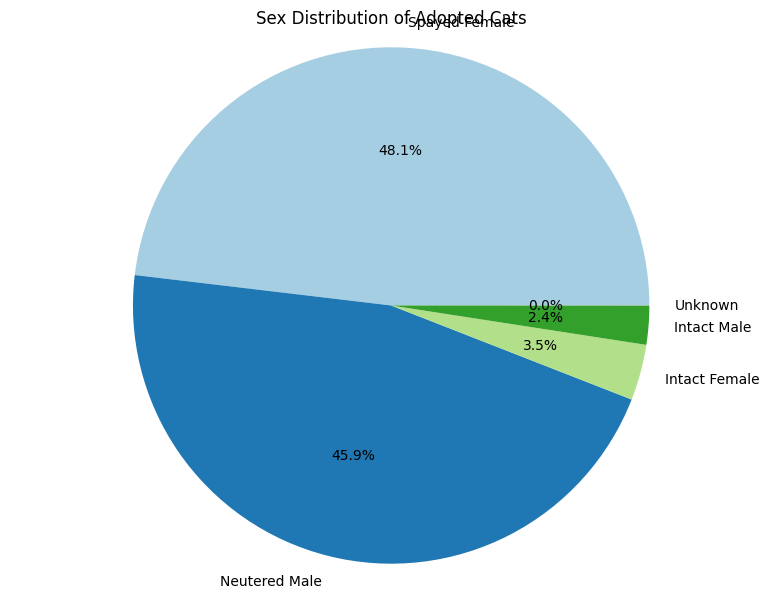

In [252]:
# Sex Analysis
sex_counts = (
    cats_adopted
    .group_by('sex_upon_outcome')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)

plt.figure(figsize=(8, 6))
plt.pie(
    sex_counts['count'].to_list(), 
    labels=sex_counts['sex_upon_outcome'].to_list(), 
    autopct='%1.1f%%', 
    colors=plt.cm.Paired.colors
)
plt.title('Sex Distribution of Adopted Cats')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()